In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import calendar


In [28]:
data = pd.read_csv("Preprocessed_Train.csv")

# Choose the feature for prediction (e.g., 'Temperature')
feature = 'Temperature'


In [29]:
selected_month = 1
data_filtered = data[data['month'] == selected_month]

# Prepare data for LSTM
data_filtered = data_filtered[['date', feature]].set_index('date')


In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_filtered)


In [31]:
def create_time_series_data(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)


In [32]:
sequence_length = 24

# Create time series data for LSTM
X, y = create_time_series_data(data_scaled, sequence_length)

# Reshape the input data to fit LSTM's input shape
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [33]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (you can adjust the number of epochs and batch size as needed)
model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0222
Epoch 2/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0065
Epoch 3/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0040
Epoch 4/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0031
Epoch 5/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0024
Epoch 6/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0019
Epoch 7/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 8/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0014
Epoch 9/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0014
Epoch 10/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0014
Epoch 11/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0012
Epoch 12/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0012
Epoch 13/50
116/116 [====

In [34]:
y_pred_scaled = model.predict(X)
y_pred = scaler.inverse_transform(y_pred_scaled)


116/116 [==============================] - 0s 2ms/step


In [52]:
average_day_temp = []
days_in_month = calendar.monthrange(2022, selected_month)[
    1]  # Replace 2023 with the desired year
for i in range(days_in_month):
    daily_temperatures = y_pred[i * 24: (i + 1) * 24]
    average_day_temp.append(np.mean(daily_temperatures))


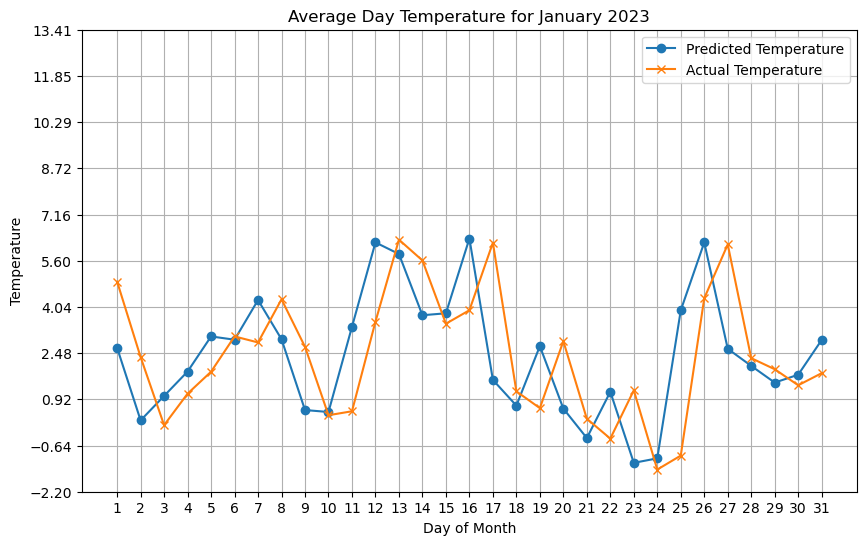

In [54]:
actual_temp_values = []
for i in range(0, len(data_filtered), 24):
    daily_actual_temperatures = data_filtered[feature][i:i + 24]
    actual_temp_values.append(daily_actual_temperatures.mean())

# Plot the graph with both predicted and actual values
day_of_month = range(1, days_in_month + 1)
plt.figure(figsize=(10, 6))
plt.plot(day_of_month, average_day_temp, marker='o',
         linestyle='-', label='Predicted Temperature')
plt.plot(day_of_month, actual_temp_values[:days_in_month], marker='x',
         linestyle='-', label='Actual Temperature')  # Use the first days_in_month values
plt.xlabel('Day of Month')
plt.ylabel('Temperature')
# Replace 2023 with the desired year
plt.title(f'Average Day Temperature for January 2023')

# Add more divisions to the y-axis scale
num_divisions = 10
step = (max(max(average_day_temp), max(actual_temp_values)) -
        min(min(average_day_temp), min(actual_temp_values))) / num_divisions
plt.yticks(np.arange(min(min(average_day_temp), min(actual_temp_values)), max(
    max(average_day_temp), max(actual_temp_values)) + step, step))

plt.xticks(np.arange(1, days_in_month + 1))
plt.grid(True)
plt.legend()
plt.show()


In [56]:
actual_temp_values = []
for i in range(0, len(data_filtered), 24):
    daily_actual_temperatures = data_filtered[feature][i:i + 24]
    actual_temp_values.append(daily_actual_temperatures.mean())

# Calculate the errors
mae = np.mean(np.abs(
    np.array(actual_temp_values[:days_in_month]) - np.array(average_day_temp)))
mse = np.mean(
    (np.array(actual_temp_values[:days_in_month]) - np.array(average_day_temp))**2)
rmse = np.sqrt(mse)

# Print the errors
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1.6175208504078453
Mean Squared Error (MSE): 4.1305286718099445
Root Mean Squared Error (RMSE): 2.032370210323391
